In [1]:
import tushare as ts
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# print(tushare.__version__)
ts.set_token("token")
pro = ts.pro_api()

In [8]:
# 获取可转债基本数据
df = pro.cb_basic(fields="ts_code,bond_short_name,stk_code,stk_short_name,list_date,delist_date,first_conv_price,conv_price")

In [9]:
df

,ts_code,bond_short_name,stk_code,stk_short_name,list_date,delist_date,first_conv_price,conv_price
0,125002.SZ,万科转债,000002.SZ,万科Ａ,2002-06-28,2004-04-30,12.10,5.850
1,125009.SZ,宝安转券,000009.SZ,中国宝安,1993-02-10,1996-01-01,25.00,19.392
2,125069.SZ,侨城转债,000069.SZ,华侨城Ａ,2004-01-16,2005-04-29,6.15,6.150
3,125301.SZ,丝绸转债,000301.SZ,东方盛虹,1998-09-15,2003-08-28,4.10,4.100
4,126301.SZ,丝绸转2,000301.SZ,东方盛虹,2002-09-24,2006-09-18,8.78,3.000
...,...,...,...,...,...,...,...,...
795,118018.SH,瑞科转债,688323.SH,瑞华泰,2022-09-14,None,30.98,30.980
796,127071.SZ,天箭转债,003009.SZ,中天火箭,None,None,53.11,53.110
797,123157.SZ,科蓝转债,300663.SZ,科蓝软件,None,None,16.02,16.020
798,113656.SH,嘉诚转债,603535.SH,嘉诚国际,None,None,22.98,22.980


In [29]:
# 获取2016-2018年上市的可转债基本信息
bond_2016_2018 = df[(df['list_date'] > "2016-01-01") & (df['list_date'] < "2018-12-30") ]

In [30]:
bond_2016_2018

,ts_code,bond_short_name,stk_code,stk_short_name,list_date,delist_date,first_conv_price,conv_price
113,123001.SZ,蓝标转债,300058.SZ,蓝色光标,2016-01-08,2019-10-24,15.30,4.28
114,110032.SH,三一转债,600031.SH,三一重工,2016-01-18,2019-03-26,7.50,7.25
115,110033.SH,国贸转债,600755.SH,厦门国贸,2016-01-19,2021-11-05,9.03,6.72
116,110034.SH,九州转债,600998.SH,九州通,2016-01-29,2022-01-17,18.78,17.83
117,113009.SH,广汽转债,601238.SH,广汽集团,2016-02-04,2022-01-24,21.99,13.92
...,...,...,...,...,...,...,...,...
227,113522.SH,旭升转债,603305.SH,旭升股份,2018-12-11,2020-02-28,29.86,29.60
228,128049.SZ,华源转债,002787.SZ,华源控股,2018-12-20,None,7.58,7.37
229,110048.SH,福能转债,600483.SH,福能股份,2018-12-28,None,8.69,7.64
230,113523.SH,伟明转债,603568.SH,伟明环保,2018-12-26,2020-02-06,23.92,17.47


In [31]:
bond_detail = pd.DataFrame()

In [52]:
for ts_code in bond_2016_2018['ts_code']:
    time.sleep(12)
    if len(bond_detail) == 0:
        bond_detail = pro.cb_daily(ts_code=ts_code)
    else:
        bond_detail = bond_detail.append(pro.cb_daily(ts_code=ts_code), ignore_index=True)

print("Complete!!!")

/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3957324227.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bond_detail = bond_detail.append(pro.cb_daily(ts_code=ts_code), ignore_index=True)
/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3957324227.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bond_detail = bond_detail.append(pro.cb_daily(ts_code=ts_code), ignore_index=True)
/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3957324227.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bond_detail = bond_detail.append(pro.cb_daily(ts_code=ts_code), ignore_index=True)
/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3957324227.py:6: FutureWarning: The fra

Complete!!!


/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3957324227.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bond_detail = bond_detail.append(pro.cb_daily(ts_code=ts_code), ignore_index=True)


In [53]:
# 获取的数据，存储到数据库中
from sqlalchemy import create_engine
engine = create_engine('sqlite:///ak_stock.db')

bond_detail.to_sql(con=engine, name='cb_detail', if_exists='append')

96185

In [62]:
bond_2016_2018['highest_price'] = 0
bond_2016_2018['lowest_price'] = 0

/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/649356163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_2016_2018['highest_price'] = 0
/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/649356163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_2016_2018['lowest_price'] = 0


In [70]:
# 获取到目前位置，可转债的价格波动情况
for index, row in bond_2016_2018.iterrows():
    bond_2016_2018.loc[index,'highest_price'] = bond_detail[bond_detail['ts_code'] == row['ts_code']]['close'].max()
    bond_2016_2018.loc[index,'lowest_price'] = bond_detail[bond_detail['ts_code'] == row['ts_code']]['close'].min()


/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3152126764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_2016_2018.loc[index,'highest_price'] = bond_detail[bond_detail['ts_code'] == row['ts_code']]['close'].max()
/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/3152126764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_2016_2018.loc[index,'lowest_price'] = bond_detail[bond_detail['ts_code'] == row['ts_code']]['close'].min()


In [72]:
# 获取可转债被交易时间
bond_2016_2018["diff_date"] = (pd.to_datetime(bond_2016_2018['delist_date']) - pd.to_datetime(bond_2016_2018['list_date']))

/var/folders/84/yp82d91d5jvdwmx6kd1td9640000gn/T/ipykernel_3793/2584989391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_2016_2018["diff_date"] = (pd.to_datetime(bond_2016_2018['delist_date']) - pd.to_datetime(bond_2016_2018['list_date']))


In [73]:
bond_2016_2018

,ts_code,bond_short_name,stk_code,stk_short_name,list_date,delist_date,first_conv_price,conv_price,highest_price,lowest_price,diff_date
113,123001.SZ,蓝标转债,300058.SZ,蓝色光标,2016-01-08,2019-10-24,15.30,4.28,156.900,85.39,1385 days
114,110032.SH,三一转债,600031.SH,三一重工,2016-01-18,2019-03-26,7.50,7.25,178.510,103.95,1163 days
115,110033.SH,国贸转债,600755.SH,厦门国贸,2016-01-19,2021-11-05,9.03,6.72,141.080,101.64,2117 days
116,110034.SH,九州转债,600998.SH,九州通,2016-01-29,2022-01-17,18.78,17.83,143.960,100.90,2180 days
117,113009.SH,广汽转债,601238.SH,广汽集团,2016-02-04,2022-01-24,21.99,13.92,146.840,98.81,2181 days
...,...,...,...,...,...,...,...,...,...,...,...
227,113522.SH,旭升转债,603305.SH,旭升股份,2018-12-11,2020-02-28,29.86,29.60,213.140,100.60,444 days
228,128049.SZ,华源转债,002787.SZ,华源控股,2018-12-20,None,7.58,7.37,131.001,91.20,NaT
229,110048.SH,福能转债,600483.SH,福能股份,2018-12-28,None,8.69,7.64,263.940,103.89,NaT
230,113523.SH,伟明转债,603568.SH,伟明环保,2018-12-26,2020-02-06,23.92,17.47,155.780,99.33,407 days


In [79]:
bond_2016_2018.dropna()['lowest_price'].mean()

95.66372580645161

<AxesSubplot:>

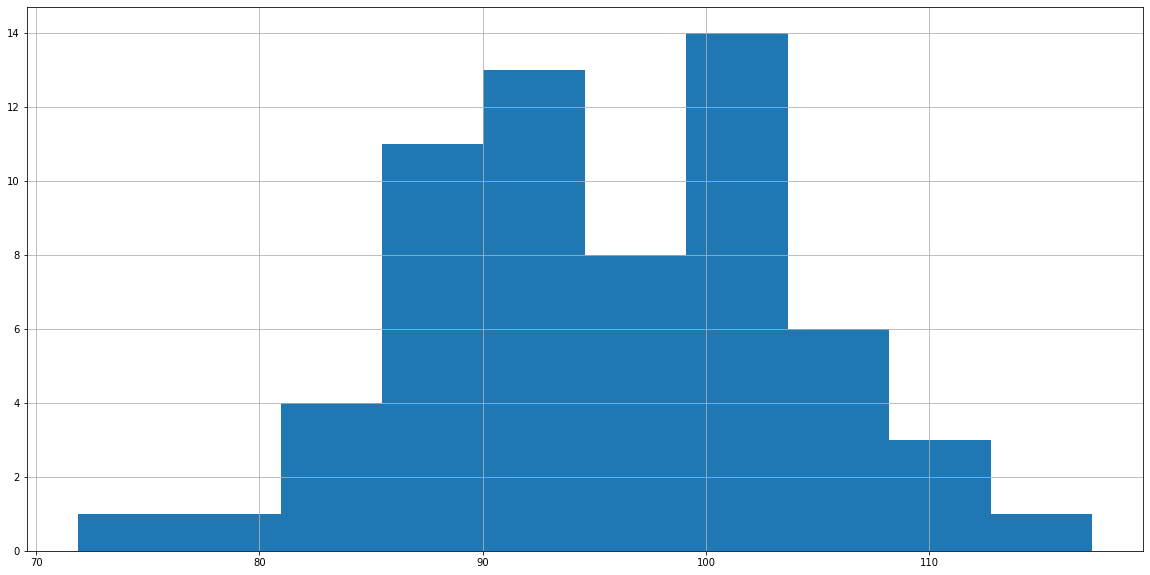

In [88]:
bond_2016_2018.dropna()['lowest_price'].hist(figsize=(20,10))

In [2]:
bond_2016_2018.dropna()['highest_price'].hist(figsize=(20,10))

NameError: name 'bond_2016_2018' is not defined

In [90]:
bond_2016_2018_new = bond_2016_2018.dropna()

In [98]:
len(bond_2016_2018_new[bond_2016_2018_new['highest_price'] > 135 ]) / len(bond_2016_2018_new)

0.9516129032258065

In [99]:
bond_2016_2018_new[bond_2016_2018_new['highest_price'] < 135 ]

,ts_code,bond_short_name,stk_code,stk_short_name,list_date,delist_date,first_conv_price,conv_price,highest_price,lowest_price,diff_date
121,113010.SH,江南转债,601199.SH,江南水务,2016-04-05,2019-02-20,19.00,6.02,131.98,99.910,1051 days
122,128012.SZ,辉丰转债,002496.SZ,辉丰股份,2016-05-17,2021-04-28,29.70,4.38,114.20,71.859,1807 days
123,127003.SZ,海印转债,000861.SZ,海印股份,2016-07-01,2022-06-08,5.26,2.99,134.80,81.991,2168 days
